# US Airline Satisfaction Mini Project 

In this Project, we would like to peform some analysis on a dataset of __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__.

## Contents
- [Problem](#problem)
- [Data Preparation](#data-preparation)
- [Exploratory Analysis](#exploratory-analysis)
- [Sampling](#sampling)

---

<a id="problem"></a>
## Problem
Based on passenger ratings, we would like to find out how the different indivudal ratings affect the passenger's final decision for a _satisfied_ or _unsatisfied_ with the service provided by US Airline.

**Specifically**:
1. Can we predict if customer would be satified?
1. What are the most important factors that affect customer satisfaction?

---

<a id="data-preparation"></a>
## Data Preparation

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import the Dataset
Source: __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__

Attached file: `satisfaction_v2.csv`  

In [83]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [60]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

#### Initial Observations
* There are `24` columns and `129880` rows in the dataset.   
* The response variable seems to be `satisfaction_v2`.
* The following `5` columns are non-predictor/unlikly to be predictors: ID, Gender, Customer Type, Age and Type of Travel.
* The remaining `18` columns are potential predictor variables.

#### Predictor Variables
* There are `16` variables identified as `int64` by default. But it seems like only `Flight Distance` and `Departure Delay in Minutes` are actually numeric. The remaining `14` variables are ratings from 0 to 5 and should be considered as Categorical.
* The `Arrivial Delay in Minutes` variable identified as `float64` by default, and it seems to be Numeric.
* The`Class` variable identified as `object` by default, and are most likely Categorical.  
* We noted that `Arrivial Delay in Minutes` seems to be missing some values.

### Dataset Cleaning

<div class="alert alert-block alert-info">
    <b>Missing Values: </b> It's noted that <code>Arrivial Delay in Minutes</code> has count <code>129487</code> instead of <code>129880</code>. This is due to it containing <code>NULL</code> values. We will replace them with <code>0</code> here.
</div>

In [13]:
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129487

In [61]:
satisfactionData['Arrival Delay in Minutes'].fillna(value=0, inplace=True)
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129880

<div class="alert alert-block alert-info">
    Check that the <code>id</code>s are unique. 
</div>

In [16]:
len(satisfactionData["id"].unique())

129880

In [58]:
test = satisfactionData;
#print(test)
scale_mapper = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5}
scaled = test["Seat comfort"].replace(scale_mapper) 

from pandas.api.types import CategoricalDtype

cat_type_ratings = CategoricalDtype(categories=[0,1,2,3,4,5], ordered=True)
test["Seat comfort"].astype(cat_type_ratings, )
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Gender                             129880 non-null  object  
 3   Customer Type                      129880 non-null  object  
 4   Age                                129880 non-null  int64   
 5   Type of Travel                     129880 non-null  object  
 6   Class                              129880 non-null  object  
 7   Flight Distance                    129880 non-null  int64   
 8   Seat comfort                       129880 non-null  category
 9   Departure/Arrival time convenient  129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Gate location             

In [57]:
test["Seat comfort"]

0         0
1         0
2         0
3         0
4         0
         ..
129875    5
129876    2
129877    3
129878    3
129879    3
Name: Seat comfort, Length: 129880, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

# TESTING

In [109]:
test = pd.DataFrame(satisfactionData)
test['Arrival Delay in Minutes'].fillna(value=0, inplace=True)

In [110]:
from pandas.api.types import CategoricalDtype

cat_type_ratings = CategoricalDtype(categories=[0,1,2,3,4,5], ordered=True)
cat_type_class = CategoricalDtype(categories=['Eco', 'Eco Plus', 'Business'], ordered=True)

test["Class"] = test["Class"].astype(cat_type_class)
test["Class"]

0              Eco
1         Business
2              Eco
3              Eco
4              Eco
            ...   
129875         Eco
129876    Business
129877         Eco
129878         Eco
129879         Eco
Name: Class, Length: 129880, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

In [111]:
test.iloc[:,8:22] = test.iloc[:,8:22].astype(cat_type_ratings)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Gender                             129880 non-null  object  
 3   Customer Type                      129880 non-null  object  
 4   Age                                129880 non-null  int64   
 5   Type of Travel                     129880 non-null  object  
 6   Class                              129880 non-null  category
 7   Flight Distance                    129880 non-null  int64   
 8   Seat comfort                       129880 non-null  category
 9   Departure/Arrival time convenient  129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Gate location             

In [112]:
# Removed redundant date

test = test.drop(['Gender','Customer Type','Age','Type of Travel','Class'], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Flight Distance                    129880 non-null  int64   
 3   Seat comfort                       129880 non-null  category
 4   Departure/Arrival time convenient  129880 non-null  category
 5   Food and drink                     129880 non-null  category
 6   Gate location                      129880 non-null  category
 7   Inflight wifi service              129880 non-null  category
 8   Inflight entertainment             129880 non-null  category
 9   Online support                     129880 non-null  category
 10  Ease of Online booking             129880 non-null  category
 11  On-board service          

In [115]:
from sklearn.preprocessing import OrdinalEncoder
cats = [0,1,2,3,4,5]
ordi = OrdinalEncoder(categories=[cats])
ordi.fit(test[['Seat comfort']])


OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5]])

In [127]:
encoded = pd.DataFrame(ordi.transform(test[['Seat comfort']]),columns=['Seat comfort'])
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Seat comfort  129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [120]:
test['Seat comfort'].unique()

[0, 1, 2, 3, 4, 5]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

[Text(669.6, 1195.92, 'Inflight wifi service <= 4.0\ngini = 0.0\nsamples = 129880\nvalue = [58793, 71087]\nclass = satisfied'),
 Text(334.8, 978.48, 'Departure/Arrival time convenient <= 0.0\ngini = 0.0\nsamples = 58170\nvalue = [45634, 12536]\nclass = neutral or dissatisfied'),
 Text(167.4, 761.0400000000001, 'Arrival Delay in Minutes <= 6.0\ngini = 0.0\nsamples = 3812\nvalue = [1213, 2599]\nclass = satisfied'),
 Text(83.7, 543.6, 'Flight Distance <= 2085.0\ngini = 0.0\nsamples = 2717\nvalue = [725, 1992]\nclass = satisfied'),
 Text(41.85, 326.15999999999997, 'Flight Distance <= 410.0\ngini = 0.0\nsamples = 1797\nvalue = [578, 1219]\nclass = satisfied'),
 Text(20.925, 108.72000000000003, 'gini = 0.0\nsamples = 148\nvalue = [11, 137]\nclass = satisfied'),
 Text(62.775000000000006, 108.72000000000003, 'gini = 0.0\nsamples = 1649\nvalue = [567, 1082]\nclass = satisfied'),
 Text(125.55000000000001, 326.15999999999997, 'Food and drink <= 2.0\ngini = 0.0\nsamples = 920\nvalue = [147, 773]\n

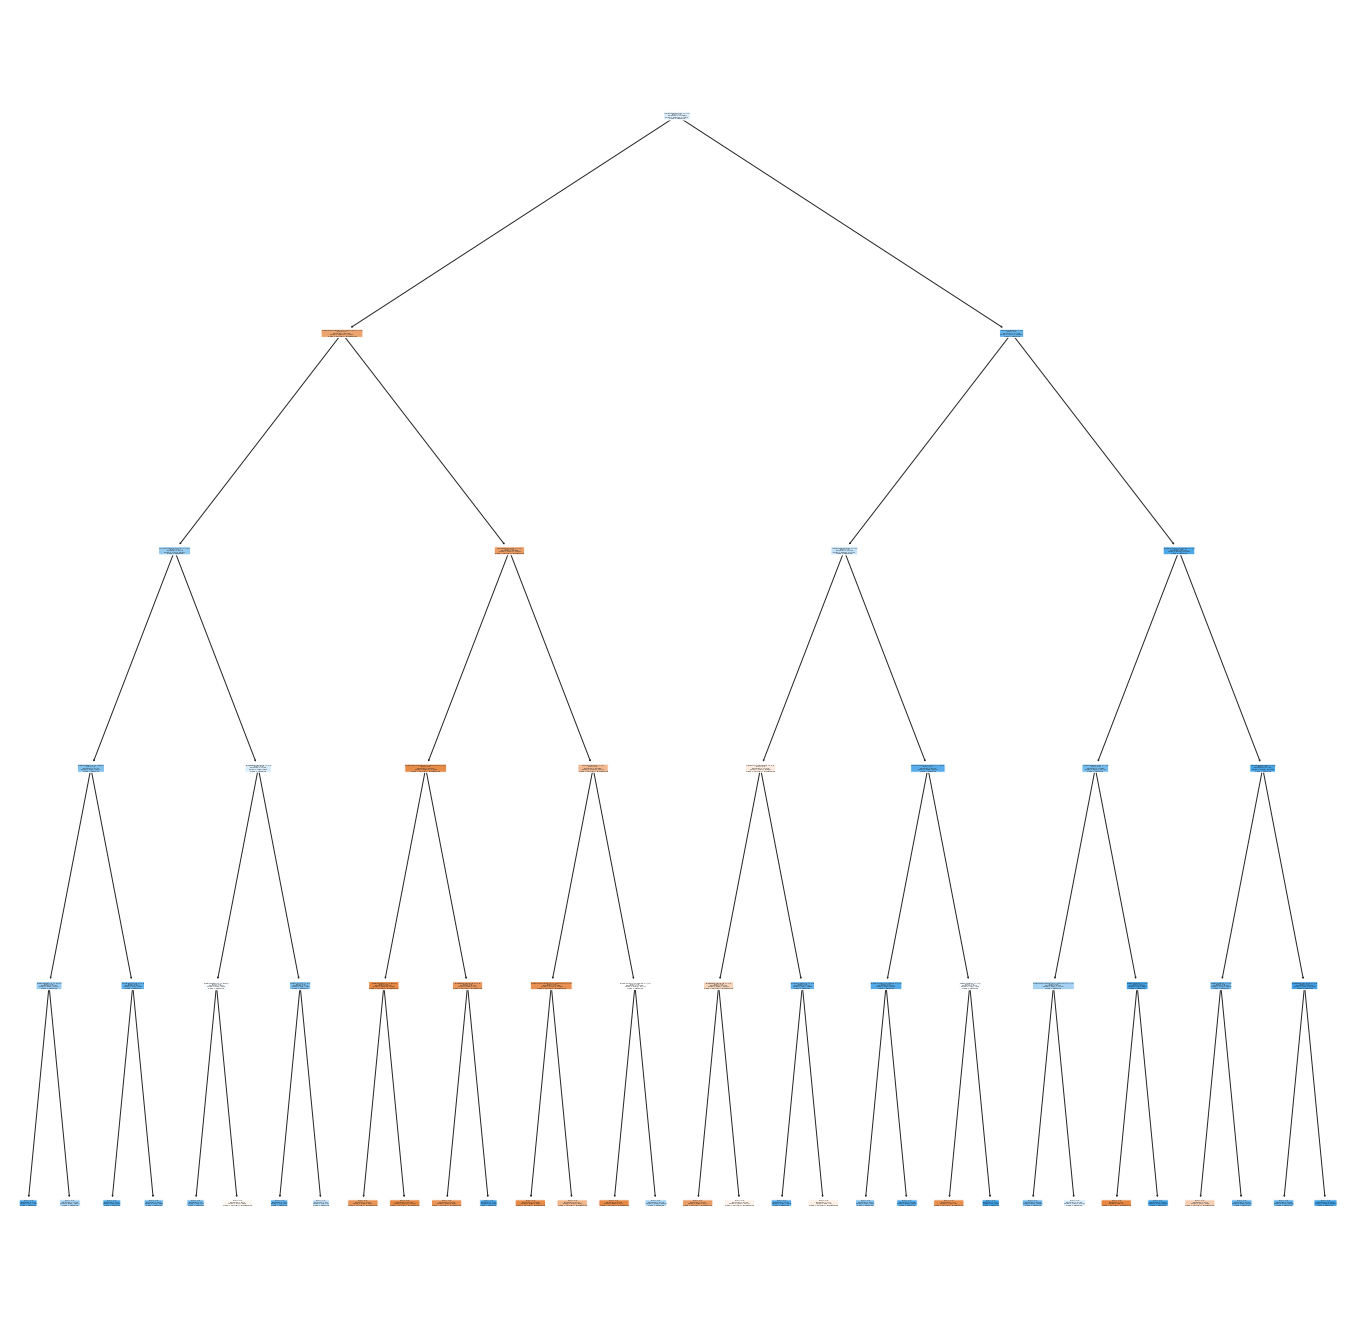

In [129]:
y = pd.DataFrame(test['satisfaction_v2'])
X = pd.DataFrame(test.drop('satisfaction_v2', axis = 1))
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X, y)
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, precision=0,
          feature_names=X.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

[Text(669.6, 1141.5600000000002, 'Inflight wifi service <= 3.5\ngini = 0.495\nsamples = 103904\nvalue = [47001, 56903]\nclass = satisfied'),
 Text(334.8, 815.4000000000001, 'Departure/Arrival time convenient <= 0.5\ngini = 0.338\nsamples = 46512\nvalue = [36488, 10024]\nclass = neutral or dissatisfied'),
 Text(167.4, 489.24, 'Arrival Delay in Minutes <= 5.5\ngini = 0.435\nsamples = 3051\nvalue = [975, 2076]\nclass = satisfied'),
 Text(83.7, 163.07999999999993, 'gini = 0.391\nsamples = 2184\nvalue = [583, 1601]\nclass = satisfied'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.495\nsamples = 867\nvalue = [392, 475]\nclass = satisfied'),
 Text(502.20000000000005, 489.24, 'On-board service <= 3.5\ngini = 0.299\nsamples = 43461\nvalue = [35513, 7948]\nclass = neutral or dissatisfied'),
 Text(418.5, 163.07999999999993, 'gini = 0.135\nsamples = 23168\nvalue = [21485, 1683]\nclass = neutral or dissatisfied'),
 Text(585.9, 163.07999999999993, 'gini = 0.427\nsamples = 20293\nvalue = 

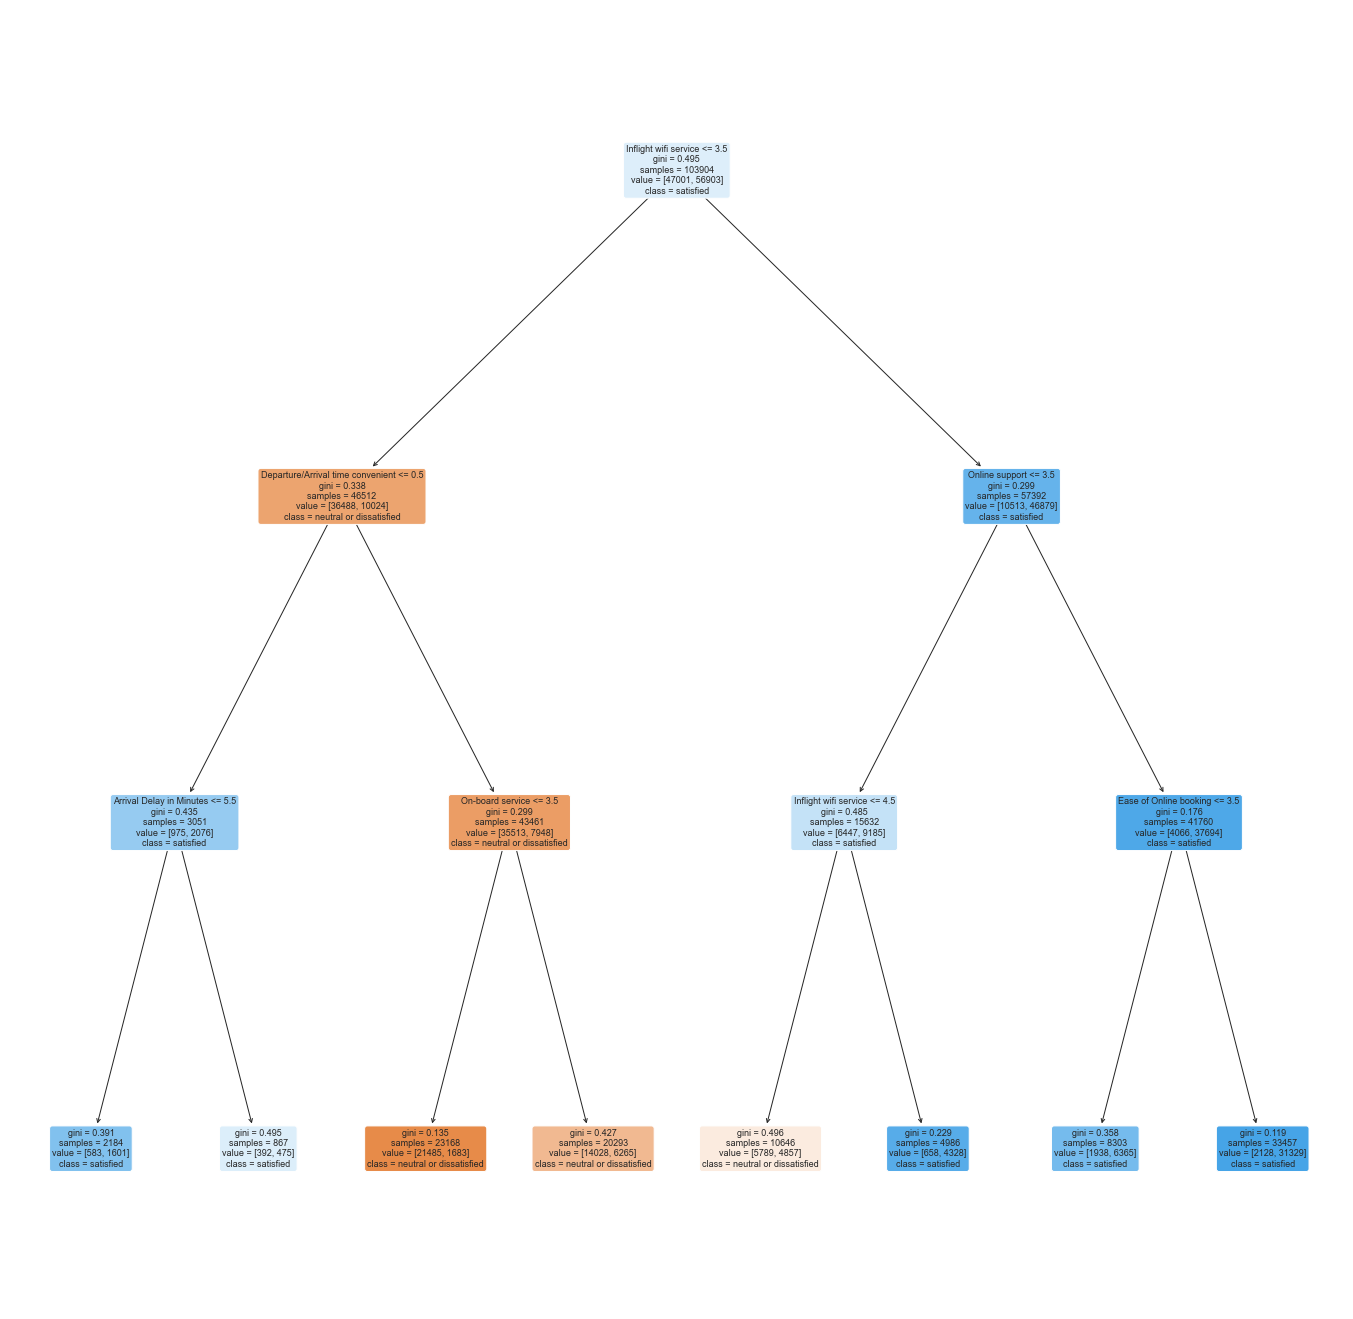

In [121]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Extract Response and Predictors
y = pd.DataFrame(test['satisfaction_v2'])
X = pd.DataFrame(test.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

---
<a id="exploratory-analysis"></a>
## Exploratory Analysis

### Response Variable
Lets take a look at the response variable `satisfaction_v2`.

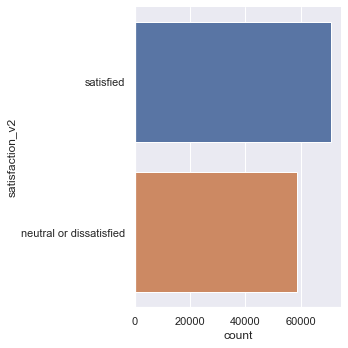

In [17]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [21]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("[satisfied] : [neutral/dissatisfied] = [", countG, "] : [", countB, "]")

[satisfied] : [neutral/dissatisfied] = [ 71087 ] : [ 58793 ]


<div class="alert alert-block alert-info">
    The <code>satisfied</code> to <code>neutral/dissatisfied</code> ratio of <code> 71087 : 58794 </code> is acceptable. We will not perform any rebalancing. 
</div>

### Predictor Variables
Lets take a look at the `18` predictor variables.<br>
We shall split them into the following subcategories.

* Customer: variables influecened by the customer.
* Service: variables corresponding to the services provided by the airline.
* Circumstance: variables that are most likely beyond the control of airline or customer

In [130]:
satisfactionData.iloc[:,6:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Class                              129880 non-null  category
 1   Flight Distance                    129880 non-null  int64   
 2   Seat comfort                       129880 non-null  category
 3   Departure/Arrival time convenient  129880 non-null  category
 4   Food and drink                     129880 non-null  category
 5   Gate location                      129880 non-null  category
 6   Inflight wifi service              129880 non-null  category
 7   Inflight entertainment             129880 non-null  category
 8   Online support                     129880 non-null  category
 9   Ease of Online booking             129880 non-null  category
 10  On-board service                   129880 non-null  category
 11  Leg room service          

#### Customer Variables
Variables influced by the customer: `Class` `Departure/Arrival time convenient`

<div class="alert alert-block alert-info">
    <b>Class (Categorical)</b><br>
    The class variable seems to describle the type of flight class the passenger was in.<br>
    Since this is normally choosen by the passenger, we labeled it under <b>Customer Variables</b><br>
    <b>Values</b><br>
    We observed that there are 3 unique values for <code>Class</code> variable.<br>
    It seems like their ordinal values(ascending) are as follows:<br>
    1: <code>Eco</code> 2: <code>Eco Plus</code> 3: <code>Business</code><br>    
    <b>Distribution</b><br>
    The most common value is <code>Business</code> which is followed closely by <code>Eco</code>.<br>    
    <code>Eco Plus</code> has the least distribution. <br>
</div>

In [23]:
satisfactionData['Class'].describe()

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object

In [24]:
satisfactionData['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

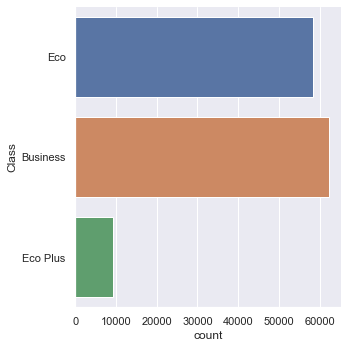

In [25]:
sb.catplot(y = 'Class', data = satisfactionData, kind = "count")

In [131]:
satisfactionData['Class']

0              Eco
1         Business
2              Eco
3              Eco
4              Eco
            ...   
129875         Eco
129876    Business
129877         Eco
129878         Eco
129879         Eco
Name: Class, Length: 129880, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

<div class="alert alert-block alert-info">
    <b>Departure/Arrival time convenient (Categorical)</b><br>
    This variable seems to describle covenience of the flight departure and arrival times.<br>
    Although flight timings are provided by the airline, the passenger normally pick the timeslot.<br>
    As such, we labeled it under <b>Customer Variables</b><br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 6.<br>
    It is a <i>rating</i> type variable.<br>
    <b>Distribution</b><br>
    Rating <code>3</code> has the highest distribution followed closely by <code>2</code> and <code>4</code><br>    
    Rating <code>0</code> has the lowest distribution. <br>
</div>

In [132]:
satisfactionData['Departure/Arrival time convenient'].describe()

count     129880
unique         6
top            3
freq       28150
Name: Departure/Arrival time convenient, dtype: int64

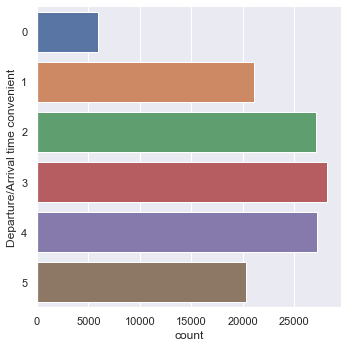

In [133]:
sb.catplot(y = 'Departure/Arrival time convenient', data = satisfactionData, kind = "count")

#### Service Variables
_Rating_ type variables that are affected by the service provided by the airline.<br>
<code>Seat comfort</code> 
<code>Food and drink</code> 
<code>Inflight wifi service</code> 
<code>Inflight entertainment</code> 
<code>Online support</code> 
<code>Ease of Online booking</code> 
<code>On-board service</code> 
<code>Leg room service</code> 
<code>Baggage handling</code>
<code>Checkin service</code>
<code>Cleanliness</code>
<code>Online boarding</code>

<div class="alert alert-block alert-info">
    We observed that there are 3 unique values for <code>Class</code> variable:<br>
    <code>Eco</code>, <code>Business</code>, <code>Eco Plus</code>.<br>
    The most common being <code>Business</code>.     
</div>

#### Circumstance Variables

Flight Distance   Gate location 

In [151]:
satisfactionData['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

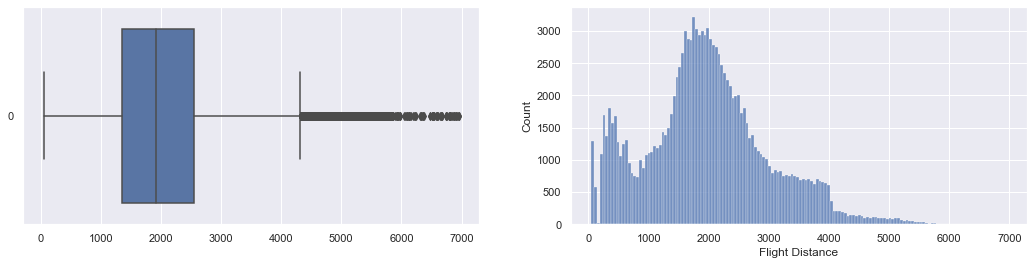

In [152]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[0])
sb.histplot(data = satisfactionData['Flight Distance'], ax = axes[1])

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

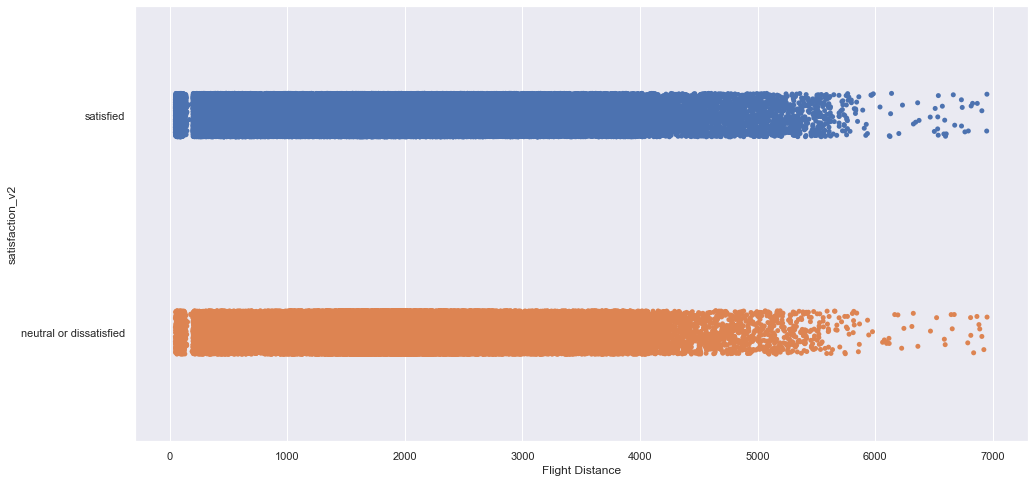

In [153]:
# satisfaction_v2 vs Flight Distance
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Flight Distance', y = 'satisfaction_v2', data = satisfactionData)

In [155]:
satisfactionData['Gate location'].describe()

count     129880
unique         6
top            4
freq       31560
Name: Gate location, dtype: int64

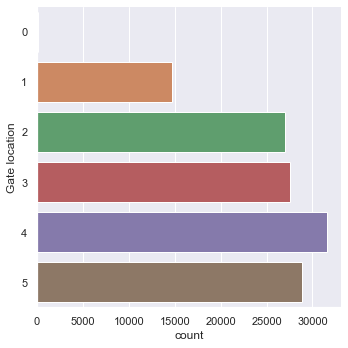

In [156]:
sb.catplot(y = 'Gate location', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Gate location', ylabel='satisfaction_v2'>

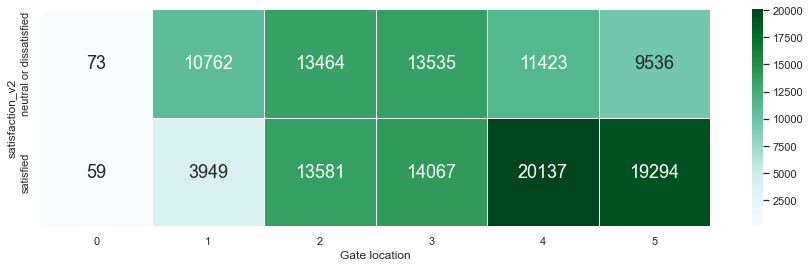

In [160]:
# satisfaction_v2 vs Gate location
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gate location']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Other Variables
Departure Delay in Minutes
Arrival Delay in Minutes

In [211]:
satisfactionData['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [223]:
test = satisfactionData.loc[~((satisfactionData['Departure Delay in Minutes'] == 0))]
test

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,3,4,4,4,2,3,2,2,310,305.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,0,5,5,5,3,3,17,15.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,4,5,3,4,2,2,30,26.0
10,89429,satisfied,Female,Loyal Customer,58,Personal Travel,Eco,104,0,0,...,3,3,0,1,2,3,5,5,47,48.0
14,32848,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,84,1,0,...,5,5,0,5,2,5,2,2,40,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,53969,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,...,2,3,5,3,5,4,2,2,5,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,3,2,...,3,2,3,3,1,2,1,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,0,3,...,4,4,3,4,2,3,2,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,2,3,...,3,3,2,3,2,1,2,2,193,205.0


In [253]:
test['Departure Delay in Minutes'].describe()

count    56524.000000
mean        33.808948
std         51.815693
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

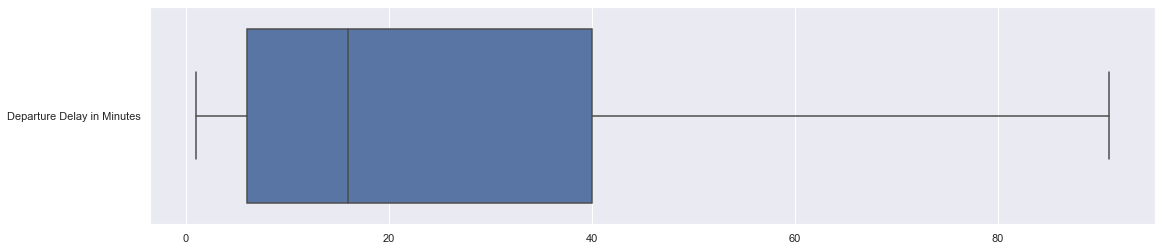

In [237]:
f = plt.figure(figsize=(18, 4))
sb.boxplot(data = test[['Departure Delay in Minutes']], orient = "h",showfliers=False)

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

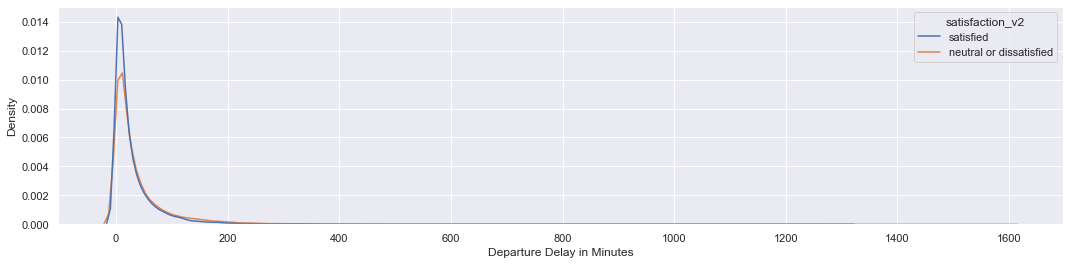

In [238]:
f = plt.figure(figsize=(18, 4))
sb.kdeplot(data = test,x='Departure Delay in Minutes',hue='satisfaction_v2')

In [255]:
departureDelay = test[['Departure Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
Q1 = departureDelay.quantile(0.25)
Q3 = departureDelay.quantile(0.75)
# Rule to identify outliers
rule = ((departureDelay < (Q1 - 1.5 * (Q3 - Q1))) | (departureDelay > (Q3 + 1.5 * (Q3 - Q1))))
outliers = rule.any(axis = 1)
departureDelay

C:\Users\User\AppData\Local\Temp/ipykernel_5580/1105828654.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((departureDelay < (Q1 - 1.5 * (Q3 - Q1))) | (departureDelay > (Q3 + 1.5 * (Q3 - Q1))))


,Departure Delay in Minutes,satisfaction_v2
1,310,satisfied
6,17,satisfied
9,30,satisfied
10,47,satisfied
14,40,satisfied
...,...,...
129874,5,satisfied
129876,174,neutral or dissatisfied
129877,155,neutral or dissatisfied
129878,193,neutral or dissatisfied


In [256]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

1          True
6         False
9         False
10        False
14        False
          ...  
129874    False
129876     True
129877     True
129878     True
129879     True
Length: 56524, dtype: bool

In [257]:
outliers.value_counts()

False    51510
True      5014
dtype: int64

In [258]:
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([     1,     41,    175,    222,    226,    243,    419,    460,
               566,    605,
            ...
            129483, 129516, 129569, 129580, 129625, 129722, 129876, 129877,
            129878, 129879],
           dtype='int64', length=5014)

In [259]:
# Remove the outliers based on the row indices obtained above
departureDelay.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
departureDelay

,Departure Delay in Minutes,satisfaction_v2
6,17,satisfied
9,30,satisfied
10,47,satisfied
14,40,satisfied
16,5,satisfied
...,...,...
129870,54,satisfied
129871,9,satisfied
129872,4,satisfied
129873,7,satisfied


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Count'>

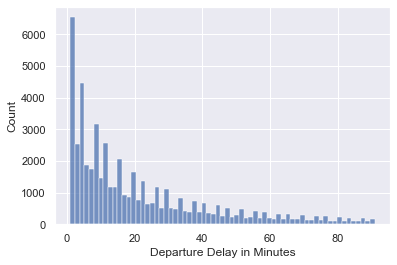

In [260]:
sb.histplot(data = departureDelay['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

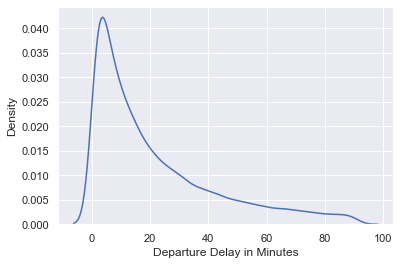

In [261]:
sb.kdeplot(data = departureDelay['Departure Delay in Minutes'])

In [249]:
departureDelay

,Departure Delay in Minutes
6,17
9,30
16,5
27,2
31,4
...,...
129865,5
129871,9
129872,4
129873,7


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

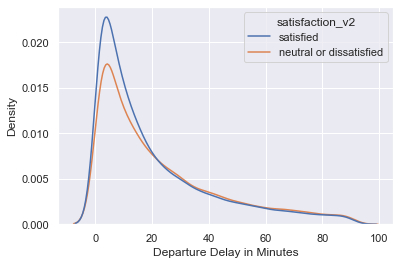

In [263]:
#f = plt.figure(figsize=(20, 20))
sb.kdeplot(data = departureDelay,x='Departure Delay in Minutes',hue='satisfaction_v2')

#### Non-Predictor Variables
Gender Customer Type Age Type of Travel

In [143]:
satisfactionData['Gender'].describe()

count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object

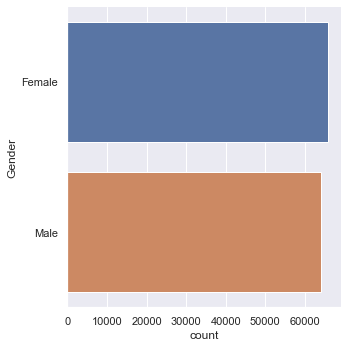

In [137]:
sb.catplot(y = 'Gender', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Gender', ylabel='satisfaction_v2'>

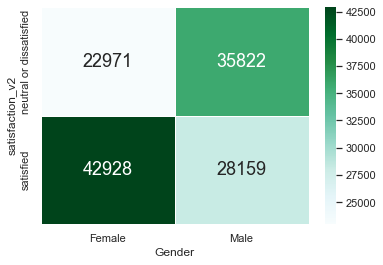

In [144]:
# satisfaction_v2 vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [145]:
satisfactionData['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='satisfaction_v2'>

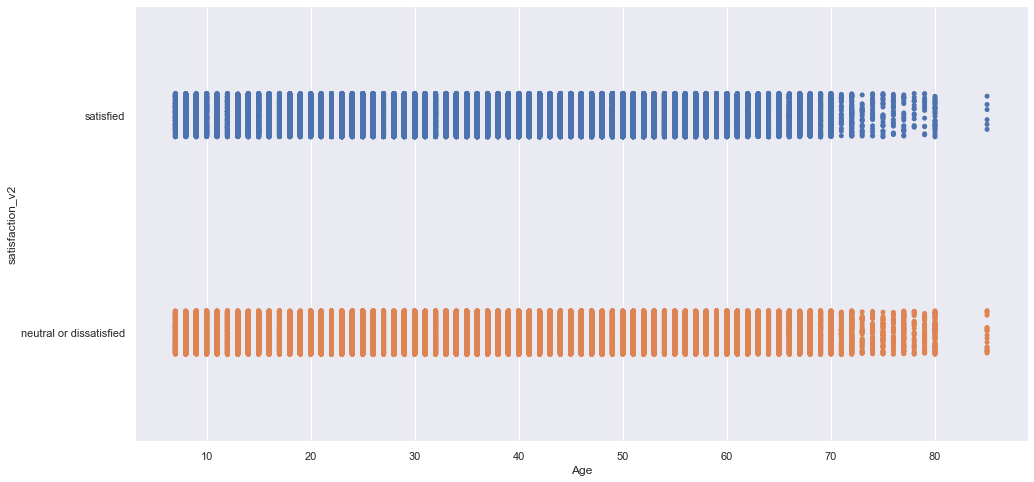

In [146]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'satisfaction_v2', data = satisfactionData)

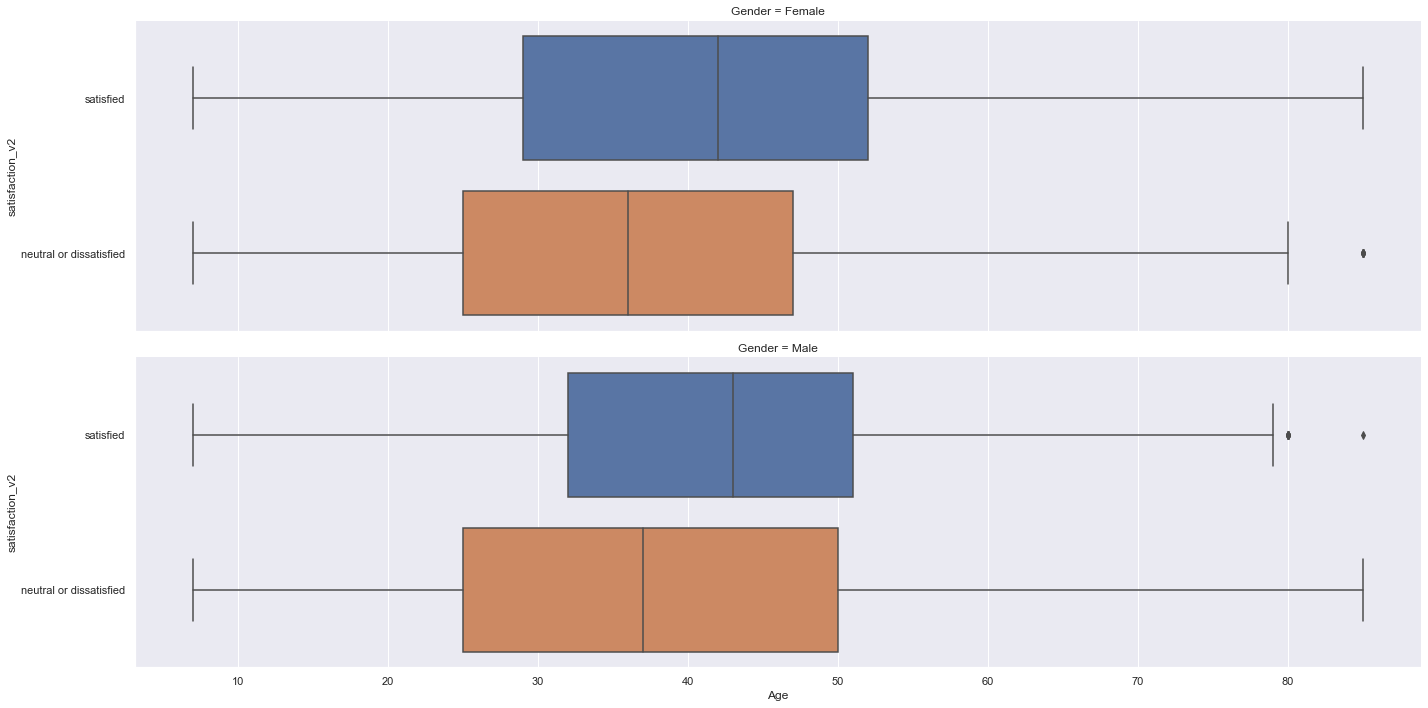

In [138]:
sb.catplot(x = 'Age', y = 'satisfaction_v2', row = 'Gender', data = satisfactionData, kind = 'box', aspect = 4)

#### Customer Type

In [147]:
satisfactionData['Customer Type'].describe()

count             129880
unique                 2
top       Loyal Customer
freq              106100
Name: Customer Type, dtype: object

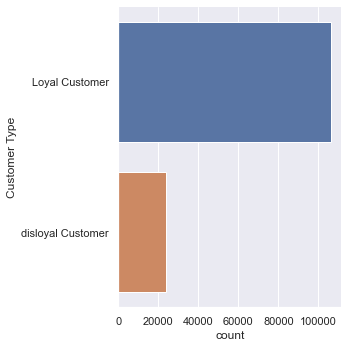

In [139]:
sb.catplot(y = 'Customer Type', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Customer Type', ylabel='satisfaction_v2'>

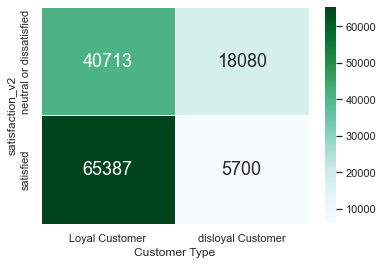

In [142]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Customer Type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Type of Travel

In [148]:
satisfactionData['Type of Travel'].describe()

count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object

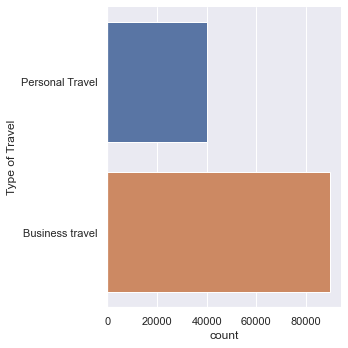

In [149]:
sb.catplot(y = 'Type of Travel', data = satisfactionData, kind = "count")

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction_v2'>

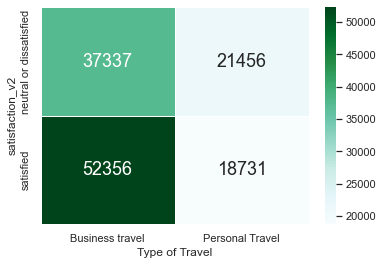

In [150]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Type of Travel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")